# 1. FELADAT

A feladatsort Python nyelven kell megoldani a jupyter notebookban. A programok legyenek modulárisak, használjanak függvényeket! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

Az előre megadott cellákon ne változtassunk!

Segítségül itt összefoglaljuk a kapcsolódó elméletet.

# Függvényillesztés a lineáris $\chi^2$ módszerrel


A lineáris $\chi^2$-illesztés módszere olyan modellek paramétereinek meghatározására alkalmas, ahol az illesztendő függvény felírható tetszőleges függvények lineárkombinációjaként, feltéve, hogy az illesztési paraméterek csak a lineárkombináció együtthatóinak szerepét töltik be, vagyis

$$ y(\mathbf{a}, \mathbf{x}) = \sum_k a_k f_k(\mathbf{x}), $$

ahol $\mathbf{a}$ a keresett paraméterekből alkotott vektor vektor, $\mathbf{x}$ pedig a független változó. További feltétel, hogy az $f_k(\mathbf{x})$ többváltozós függvények az összes $\textbf{x}$ mérési pontban kiértékelhetők legyenek. Amennyiben a mérési hiba gauss-i, úgy az $y_i$ mért értékek hibáját egy $\sigma_i$ értékkel jellemezhetjük, ahol az $i$ index a mérési pontokon fut. A függvényillesztés jóságát a

$$
\chi^2(\mathbf{a})
    = \sum_i \frac{\left[ y(\mathbf{a}, \mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
    = \sum_i \frac{\left[ \sum_k a_k f_k(\mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
$$

mennyiséggel jellemezhetjük, mely Gauss-eloszlású hiba esetében egzaktul következik a _maximum likelihood_ módszerből. A legjobban illeszkedő modellre a $\chi^2$ kifejezésének értéke minimális, azaz azokat az $a_k$ paramétereket keressük, melyek mellett $\chi^2$ parciális deriváltjai eltűnnek:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} = 0
$$

minden $a_k$-ra. A parciális deriváltakra így felírt egyenletrendszer általában nem lineáris, így a megoldására közvetlen gyökkereső módszerekkel nem sok esélyünk van. Amennyiben azonban az $y(\mathbf{a}, \mathbf{x})$ modellt a fent bevezett lineárkombináció alakjában adjuk meg, úgy könnyen belátható, hogy a deriváltak nullává tétele a kövezkező egyenletrendszerre vezet:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    2 \cdot \sum_i \left[ \frac{1}{\sigma_i^2} \cdot 
        \left( 
            \sum_j a_j f_j(\mathbf{x}_i) - y_i
        \right) \cdot f_k(\mathbf{x}_i) \right] = 0.
$$

Ez már lineáris egyenletrendszer az $a_k$ együtthatókra, hiszen az $y_i$ mért értékek és az $f_k(\mathbf{x}_i)$ bázisfüggvények az $\mathbf{x}_i$ mérési pontokban ismertek. Könnyű belátni, hogy némi átírás után bevezethető egy $X_{ik}$, ún. tervmátrix, és egy $b_i$ hibával redukált vektor:

$$
X_{ik} = \frac{f_k(\mathbf{x}_i)}{\sigma_i} \quad \quad \quad
b_i = \frac{y_i}{\sigma_i}.
$$

A parciális deriváltak nullává tételével felírt egyenletrendszer ezekkel a jelölésekkel

$$
    \sum_i \left[ \left( \sum_j a_j X_{ij} - b_i \right) X_{ik} \right] = 0
$$

alakúnak adódik, mely átrendezés után 

$$
\sum_i \sum_j X_{ij} X_{ik} a_j  = \sum_i X_{ik} b_i,
$$

vagy mátrixos írásmóddal

$$
\mathbf{X}^{T} \mathbf{X} \mathbf{a} = \mathbf{X}^{T} \mathbf{b}
$$

alakot ölt. Az egyenletet $\mathbf{a}$-ra megoldva megkapjuk a $\chi^2$-et minimalizáló paramétereket.

## Az illeszkedés jósága: a redukált $\chi^2$

Mivel a $\chi^2$-re felírt kifejezés függ a mérési pontok számától, ezért a $\chi^2$ értéke nem használható arra, hogy két, különböző mérési sorozat esetében megállapítsuk, hogy ugyanaz a modell mennyire jól illeszkedik az egyik vagy másik adatsorra. Éppen ezért érdemes bevezetni a redukált $\chi^2$ nevű mennyiséget:

$$
\chi^2_\nu = \frac{\chi^2}{\nu},
$$

ahol $\nu = N - M$ a szabadsági fokok száma, azaz a mérési adatpontok száma mínusz az illesztendő paraméterek száma. Jó illesztésről akkor beszélhetünk, ha $\chi^2_\nu \lesssim 1$.

## Az illesztett paraméterek aszimptotikus hibája

A lineáris $\chi^2$ módszerrel illesztett modellek paramétereinek hibáját úgy becsülthetjük meg, hogy tekintjük a $\chi^2(\mathbf{a})$ függvény második parciális deriváltjaiból alkotott mátrixot, hiszen a $\chi^2$ kifejezésének Taylor-sorában az ennek megfelelő tag nem tűnik el minimum környezetében. Tekintve, hogy

$$
\frac{1}{2}\frac{\partial^2 \chi^2(\mathbf{a})}{\partial a_k \partial a_l} =
    \sum_i X_{ik} X_{il} = \sum_i \frac{f_k(\mathbf{x}_i) f_l(\mathbf{x}_i)}{\sigma_i^2} =
    \alpha_{kl},
$$

az így bevezett $\mathbf{\alpha} = \mathbf{X}^{T} \mathbf{X}$ szimmetrikus mátrixról belátható, hogy annak $\mathbf{C} = \mathbf{\alpha}^{-1}$ inverze, az ún. kovarianciamátrix, jól jellemzi az illesztett paraméterek hibáját és kovarianciáját. Az $a_k$ paraméter hibája egyszerűen $\sigma_{a_k}^2 = C_{kk}$, míg az $a_k$ és $a_l$ paraméterek kovarianciája a $ \textrm{cov}(a_k, a_l) = C_{kl}$ mátrixelem. Az így kiszámított hibák ún. aszimptotikus hibák, hiszen csupán a $\chi^2$ felület másodrendű közelítését veszik figyelembe a minimumhely környezetében.

## Hibabecslés a jackknife és a bootstrap módszerrel

Az illesztett paraméterek hibájának pontos megbecslését olyan Monte Carlo módszerrel végezhetnénk el, mely képes mintavételezni az illesztési paraméterek pontos $p(\mathbf{a})$ együttes eloszlásfüggvényét.
Tehát ha a teljes mérést tudjuk sokszor ismételni valóságban, vagy szimulációban, akkor meg tudjuk határozni a paraméterek eloszlását és hibáját.
Általában erre nincs lehetőségunk, egyetlen mérés adatsorából kell dolgoznunk. Viszont tudunk mesterséges adatsorokat készíteni a mért adatsorunkból. Ezeken vizsgálva a paraméterek elsozlását következtethetünk a valódi mérés paramétereinek pontosságára.
Két ilyen módszert fogunk kipróbálni:

A jackknife módszer esetében egy-egy mérési pontot kihagyunk az eredeti adatsorból. $N$ pont esetén ezt $N$-féleképpen tehetjük meg, így ennyi mesterséges adatsort kapunk. Mindegyikre elvégezve az illesztést így kapunk becslést a paraméterekre és pontosságukra:
$$ \mathbf{a}_{\rm jack} = \frac{1}{N} \sum_i \mathbf{a}_{(i)}\;,\;\;\;
\sigma_{{\rm jack},k}^2 = \frac{N-1}{N} \sum_i (a_{(i),k}-a_{{\rm jack},k})^2\;\;,\;\;
$$
ahol $\mathbf{a}_{(i)}$ az $i$-dik mesterséges adatsorra illesztve kapott paramétervektor és $a_{(i),k}$ ennek a k-ik 
komponense. 

Másik gyakran használt, egyszerű eljárás a [bootstrap](https://outdoors.stackexchange.com/questions/11709/whats-the-purpose-of-the-sling-on-the-heel-of-boots) módszer, ahol az adatokból visszatevéses véletlen mintavételezéssel új, az eredetivel azonos hosszúságú ${\cal D}^{(S)}_1$ mesterséges adatsort hozunk létre. Az illesztést az új adatsorra is elvégezzük. Majd az eredeti adatsorból a mintavételezést és mindegyik kapott ${\cal D}^{(S)}_i$ adatsorra az illesztést megismételjük.
Kellően sokszor megismételve az eljárást a kapott $\mathbf{a}^{(S)}_{(i)}$ illesztési paramétervektorok egy eloszlást adnak az eredeti adatsorra illesztett $\mathbf{a}_{(0)}$ körül. És ez az eloszlás közel áll ahhoz, amit az eredeti mérés ismétlésével kapnánk az $\mathbf{a}^{(R)}_{(i)}$ illesztett paraméterekre az ismeretlen valódi $\mathbf{a}_{\rm true}$ vektor körül, azaz
$ \mathbf{a}^{(S)}_{(i)} - \mathbf{a}_{(0)} $   és   $ \mathbf{a}^{(R)}_{(i)} - \mathbf{a}_{\rm true} $ eloszlása hasonló.
Így $\mathbf{a}^{(S)}_{(i)}$ szórása jól jellemzi az $\mathbf{a}_{(0)}$ pontosságát.


## Irodalomjegyzék

* Press, Teukolsky, Vetterling & Flannery: Numerical Recipes (in C), 3. kiadás, Cambridge University Press, 15.4. fejezet

# Feladatok

## Alap 1. feladatrész

Az alábbi függvény egy véletlenszerű adatsort generál, mérési folyamatot szimulál. Az előre megadott cellákon ezért ne változtassunk!
Írjunk egy 'myfit' függvényt, mely az adatokra parabolát illeszt! A program ne beépített függvényillesztő rutint használjon, hanem végezze el a számolást a fent definiált $X_{ij}$ mátrix előállításával, és felírt lineáris egyenletrendszer megoldásával! Az egyenletrendszer megoldására tetszőleges függvénykönyvtár használható. Ábrázoljuk az adatokat és az eredményt! Próbáljuk meg úgy megírni a függvényt, hogy az tetszőleges fokszámú polinom illesztésére is alkalmas legyen!
Teljes pontszámért úgy írjuk meg a függvényt, hogy vektorosan kezeljük az adatokat, azaz a tervmátrix egy oszlopát (vagy sorát) egyszerre hozzuk létre, ne két egymásba ágyazott ciklussal. Az ügyesebbek teljesen mellőzni tudják a for ciklust.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_data(N, M=0):
    a = ( np.random.rand() + 1 ) / 5 * np.random.choice([-1,1])
    b = ( np.random.rand() + 1 ) * np.random.choice([-1,1])
    c = - 32 * ( np.random.rand() + 1 ) * a
    x = np.linspace(-10, 10, N)
    sigma = 2 * (np.random.rand(N) + 1)
    y = np.random.normal(a * x**2 + b * x + c, sigma)
    if M>0:
        idx = random.choice(range(N),M,replace=False)                     # ne legyen ismétlés
        y[idx] = np.min(y) + np.random.rand(M) * (np.max(y) - np.min(y))  # ne legyenek egyformák
    return x, y, sigma

In [2]:
x, y, sigma = random_data(101)

Text(0.5, 1.0, 'Mérési pontok hibaintervallumokkal')

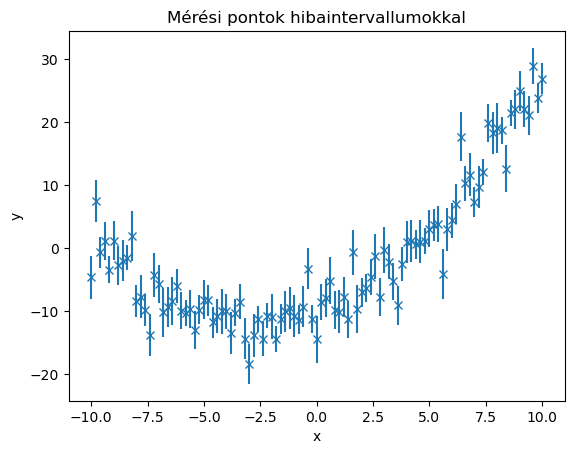

In [3]:
# ábra a mérési pontokkal és hibaintervallumokkal
plt.errorbar(x, y, yerr=sigma, fmt='x') #erorrbar segítségével ábrázolom a pontokat a hibaintervallumaikkal, megadva a jelőlás módját
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mérési pontok hibaintervallumokkal') #tengelyfeliratok és cím

In [4]:
# az illesztést elvégző program helye
def myfit(x,y,sigma,N): # definiálom a fv változókat, ahol x az x adatsor y az y adatsor, sigma a pontpárokhoz tartozó hiba, és N az illeszteni kívánt modell foka

    X = np.vander(x,N+1)/np.vstack(sigma) #np.vander beepitett fvnyel legyartom a matrixot ami fk xi összegzéssel lenne és a hibákat miután átalakítpttam vertikális vektorrá elosztom
    b = np.vstack(y/sigma) #szintén vertikális vektorrá alkotva az y osztva hibáival mind2nel az array tulajdonságai miatt lehet osztani
        
    
    a = np.linalg.lstsq(X, b, rcond=None) #linear matrix equtaion keresesre talalat, megoldja a kívánt egyenletrendszerünket

    return np.hstack(a[0]) 

Illesztett parabola paraméterei: a =  0.24762160920383858 b = 1.3227875884448714 c = -10.195454336450736


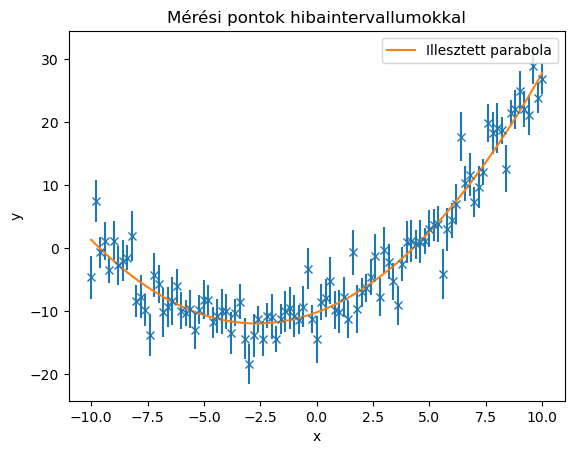

In [5]:
# ábra a másodfokú illesztéssel
def parabolic(x,a,b,c):
    return a*(x**2)+b*x+c
parameters = myfit(x,y,sigma,2)

a, b, c = parameters
print("Illesztett parabola paraméterei: a = ",a, 'b =', b ,'c =', c)

plt.errorbar(x, y, yerr=sigma, fmt='x')
plt.plot(x,parabolic(x,a,b,c),label='Illesztett parabola')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mérési pontok hibaintervallumokkal')
plt.legend() #paraméterek deklarálva, illetve ábra tulajdonságai megadva

## Alap 2. feladatrész

Írjuk függvényt, mely meghatározza az illesztett paraméterek kovariancia mátrixát és ennek segítségével 
a paraméterek aszimptotikus hibáját.

In [6]:
# a szórások és aszimptotikus hibák meghatározása

def aserr(x,y,sigma,N):
    X = np.vander(x,N+1)/np.vstack(sigma)
    
    return np.linalg.inv(np.matmul(X.transpose(), X))  #a már eddig ismert módon matrixok inverzet transzponáltját és a mátrix szorzást segítő fvnyel elvégzem a számolást

In [7]:
print('Kovariancia mátrix:',aserr(x,y,sigma,2))

Kovariancia mátrix: [[ 8.42286670e-05 -2.01543755e-05 -2.90449506e-03]
 [-2.01543755e-05  2.30932563e-03  7.08778585e-04]
 [-2.90449506e-03  7.08778585e-04  1.79620929e-01]]


In [8]:
var = ['a','b','c']
covmatr = aserr(x,y,sigma,2)
for num,i in enumerate(var):
    print('\u03c3(',i,') = ', covmatr[num][num])

σ( a ) =  8.422866701928202e-05
σ( b ) =  0.0023093256275646622
σ( c ) =  0.17962092945052247


In [9]:
for i in range(3):
    for j in range(2):
        if i == 1:
            pass
        elif i != j:
            print('Cov(',var[i],',',var[j],')=',covmatr[i][j])
        

Cov( a , b )= -2.015437551113978e-05
Cov( c , a )= -0.002904495061893383
Cov( c , b )= 0.0007087785845086953


Az előbbi hibaszámítás akkor is kicsi hibát ad, ha a szükségesnél kisebb fokszámú polinomot illesztünk, pl. a parabola mentén elhelyezkedő adatokra egyenest. Ezt felfoghatjuk úgy, hogy ez a módszer azt ondja meg, mekkokra szórása adódik az illesztett paramétereknek csupán a mérési adatok bizonytalanságából.

## Teljes 3. feladatrész
a) Határozzuk meg az illesztett parabola paramétereinek értékét és a paraméterértékek szórásnégyzetét a jacknife módszer segítségével!
Egymás után kiíratva a kovarianciamátrixból számolt és itt kapott eredményeket hasonlítsuk őket össze!

b) A bootstrap eljárás segítségével készítsünk 1500 új adathalmazt az eredeti adatokból, és végezzük el mindegyikre a parabola illesztést!  A kapott illesztési paraméterek eloszlásáról készítsünk hisztogramot és ennek segítségével számítsuk ki a paraméterek várható értékét és szórásnégyzetét!
Bővítsük az a) pontbeli összehasonlítást az itt kapott eredményekkel!

c) Scatter ploton ábrázoljuk, hogy a boostrap módszer alapján hogyan oszlanak el.
Mivel sok pontunk lesz, használjunk pici szimbólumot, pl. a "." argumentum megadásával!
Ahhoz, hogy jól lássuk az egyes paraméter-párok közötti korrelációt, az ábrákat kb. négyzet alakban hozzuk létre!
Fogalmazzuk meg, hogy mennyire látunk korrelációt, és ez mennyire egyezik a 2. részben kapott eredményekkel!

In [10]:
# a)
# jacknife módszer megvalósítása, paraméter értékek és szórásnégyzeteik számolása
def jacknife(x,y,sigma,N):
    templist = []
    
    for i in range(len(x)):
        tempx = np.delete(x,i) 
        tempy = np.delete(y,i) 
        tempsigma = np.delete(sigma,i)
        tempparam = myfit(tempx,tempy,tempsigma,N)
        templist.append(np.vstack(tempparam)) #ideiglenes listák segítségével végrehajtom a megadott módszert,megint az arrayre np.delete van segítségemre
    
    return np.mean(np.array(templist),axis = 0), ((len(x)-1)/len(x))*np.sum((np.array(templist)-np.mean(np.array(templist),axis=0))**2,axis = 0)
# összehasonlítás
ajack,sigmajack=jacknife(x,y,sigma,2)

for num, i in enumerate(var):
    print('Myfit függvény használatával:', i, '=',parameters[num],',majd jacknife módszerrel:',i,'=',ajack[num][0])
for num, i in enumerate(var):
    print('\u0394',i,'=',np.absolute(parameters[num]-ajack[num][0]))

for num,i in enumerate(var):
    print('Kovariancia mátrix segítségével : \u03c3(',i,') = ', covmatr[num][num],',majd jacknife módszerrel \u03c3(',i,')', (sigmajack[num][0]),)
    
for num,i in enumerate(var):
    print('\u0394\u03c3(',i,')=' ,np.absolute(covmatr[num][num]-sigmajack[num][0]))  

Myfit függvény használatával: a = 0.24762160920383858 ,majd jacknife módszerrel: a = 0.24762295398322218
Myfit függvény használatával: b = 1.3227875884448714 ,majd jacknife módszerrel: b = 1.3227873213664787
Myfit függvény használatával: c = -10.195454336450736 ,majd jacknife módszerrel: c = -10.19548267010155
Δ a = 1.3447793835996702e-06
Δ b = 2.6707839273498735e-07
Δ c = 2.8333650814005296e-05
Kovariancia mátrix segítségével : σ( a ) =  8.422866701928202e-05 ,majd jacknife módszerrel σ( a ) 8.908941112780301e-05
Kovariancia mátrix segítségével : σ( b ) =  0.0023093256275646622 ,majd jacknife módszerrel σ( b ) 0.0025348742758610635
Kovariancia mátrix segítségével : σ( c ) =  0.17962092945052247 ,majd jacknife módszerrel σ( c ) 0.13076795590110604
Δσ( a )= 4.860744108520993e-06
Δσ( b )= 0.00022554864829640127
Δσ( c )= 0.04885297354941642


Bootstrap módszerrel a várható értéke a változónak: 0.24767390317258675 hozzatartozó szórásnégyzetek: 8.880164674772934e-05
Bootstrap módszerrel a várható értéke b változónak: 1.3218167274294075 hozzatartozó szórásnégyzetek: 0.002363651561141917
Bootstrap módszerrel a várható értéke c változónak: -10.203938253221633 hozzatartozó szórásnégyzetek: 0.13172166841474311
Myfit függvény használatával: a = 0.24762160920383858 ,majd jacknife módszerrel: a = 0.24762295398322218 majd bootstrap módszerrel a = 0.24767390317258675
Myfit függvény használatával: b = 1.3227875884448714 ,majd jacknife módszerrel: b = 1.3227873213664787 majd bootstrap módszerrel b = 1.3218167274294075
Myfit függvény használatával: c = -10.195454336450736 ,majd jacknife módszerrel: c = -10.19548267010155 majd bootstrap módszerrel c = -10.203938253221633
Kovariancia mátrix segítségével : σ( a ) =  8.422866701928202e-05 ,majd jacknife módszerrel σ( a ) 8.908941112780301e-05 majd bootstrap módszer segítségével σ( a ) =  8.88

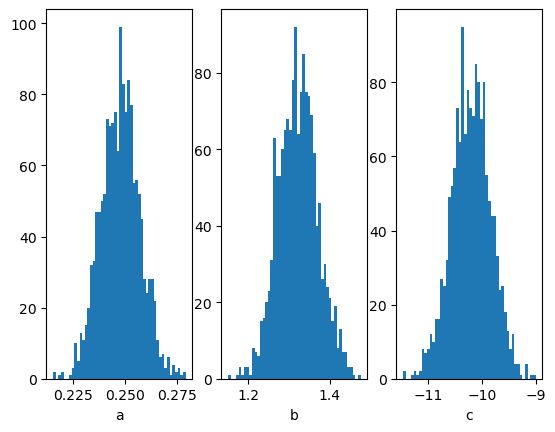

In [11]:
# b)
# a bootstrap módszer megvalósítása
def bootstrap(x,y,sigma,N,count):
    templist = []
    counter = 0
    while counter < count + 1:
        choosen = np.random.choice(len(x),size = len(x))
        xtemp = x[choosen]
        ytemp = y[choosen]
        sigmatemp = sigma[choosen] 
        templist.append(myfit(xtemp,ytemp,sigmatemp,N))
        counter +=1
    return templist
        
        
# a várható értékek, szórások és kovarianciák meghatározása
params = bootstrap(x,y,sigma,2,1500)
fig,(a,b,c) = plt.subplots(1,3)
a.hist(np.array(params)[:,0],bins = 50)
b.hist(np.array(params)[:,1],bins = 50)
c.hist(np.array(params)[:,2],bins = 50)
a.set_xlabel('a')
b.set_xlabel('b')
c.set_xlabel('c')
for num, i in enumerate(var):
    print('Bootstrap módszerrel a várható értéke',i,'változónak:',np.mean(np.array(params),axis = 0)[num],'hozzatartozó szórásnégyzetek:',np.std(np.array(params),axis = 0)[num]**2)
    

# összehasonlítás
for num, i in enumerate(var):
    print('Myfit függvény használatával:', i, '=',parameters[num],',majd jacknife módszerrel:',i,'=',ajack[num][0],'majd bootstrap módszerrel',i,'=',np.mean(np.array(params),axis = 0)[num])
    
for num,i in enumerate(var):
    print('Kovariancia mátrix segítségével : \u03c3(',i,') = ', covmatr[num][num],',majd jacknife módszerrel \u03c3(',i,')', (sigmajack[num][0]),'majd bootstrap módszer segítségével \u03c3(',i,') = ',np.std(np.array(params),axis = 0)[num]**2)


Text(0.5, 1.0, 'b és c paraméterek összefüggése')

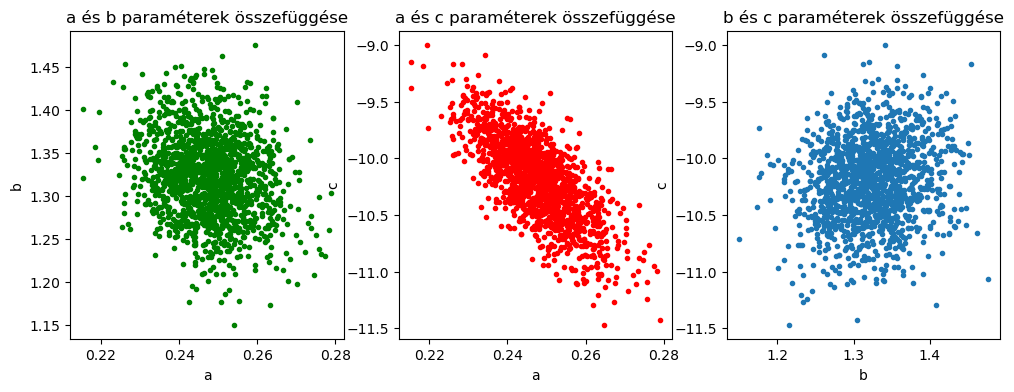

In [12]:
# c)
# scatter plotok és tapasztalatok megfogalmazása
fig,(ab,ac,bc) = plt.subplots(1,3,figsize=(12, 4))
ab.scatter(np.array(params)[:,0],np.array(params)[:,1],marker = '.',color = 'green')
ab.set_xlabel('a')
ab.set_ylabel('b')
ab.set_title('a és b paraméterek összefüggése')
ac.scatter(np.array(params)[:,0],np.array(params)[:,2],marker = '.',color = 'red')
ac.set_xlabel('a')
ac.set_ylabel('c')
ac.set_title('a és c paraméterek összefüggése')
bc.scatter(np.array(params)[:,1],np.array(params)[:,2],marker = '.')
bc.set_xlabel('b')
bc.set_ylabel('c')
bc.set_title('b és c paraméterek összefüggése')

Nagyjából az jött amire vártunk, a és b illetve b és c kovarianciáji voltak a legkisebbek, ezek meglátszanak az ábrán is hiszen viszonylag egyenletesen helyezkednek el a pontok az átlag körül, míg az a és c kovarianciája volt a legnagyobb ez látszik is, az átlagtól itt térnek el a pontpárok a legjobban, a változása esetén drasztikusabban változik c is ( ugyanez természetesen fordítva is igaz), ez a negatív kovarianciát szemlélteti.

## Teljes 4. feladatrész

a) A redukált $\chi^2$ érték segítségével próbáljuk eldönteni, hogy az adataink hanyadfokú polinomot követnek valójában! Számítsuk ki $n=1\ldots7$ közötti fokszámú polinom illesztésére a redukált $\chi^2$ értékeket és ábrázoljuk őket  $n$ függvényében! Próbáljuk ennek segítségével leolvasni a tényleges fokszámot!

b) Idemásolva az adatsort generáló utasítást, futtassuk le a fenti számítást több egymás utáni adatsoron is!    Próbáljuk ki, milyen gyakran következtetnénk $n=2$-re!
Fogalmazzuk meg a tapasztaltakat!


In [13]:
# a redukált chi^2 értékét számoló függvény
def redchi2(x,y,sigma,N):
    params = myfit(x,y,sigma,N)
    chi2 = np.sum(((np.matmul(np.vander(x,N+1),params)-y)**2)/sigma**2,axis = 0)
    v = len(x)-N-1
    return chi2/v #szintén eddig is használt eszközökkel számolom a fentebb megadott kiszámítandó értéket

Text(0.5, 1.0, 'Chi négyzet fokszám fv.-ben')

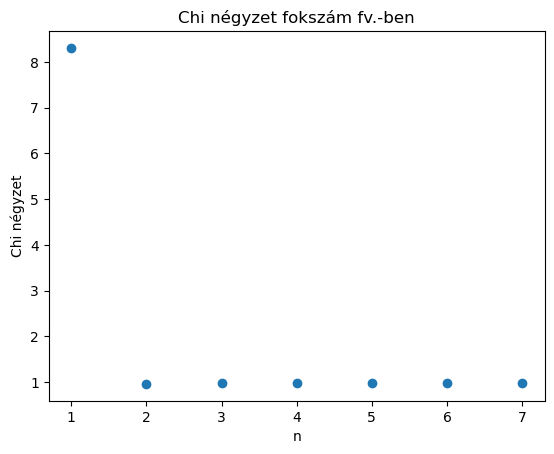

In [14]:
# modell választás próba
# nézzük meg chi2r értékét n függvényében
chilist=[]
nlist=[]
for i in range(1,8):
    chilist.append(redchi2(x,y,sigma,i))
    nlist.append(i)

plt.scatter(nlist,chilist)
plt.xlabel('n')
plt.ylabel('Chi négyzet')
plt.title('Chi négyzet fokszám fv.-ben')

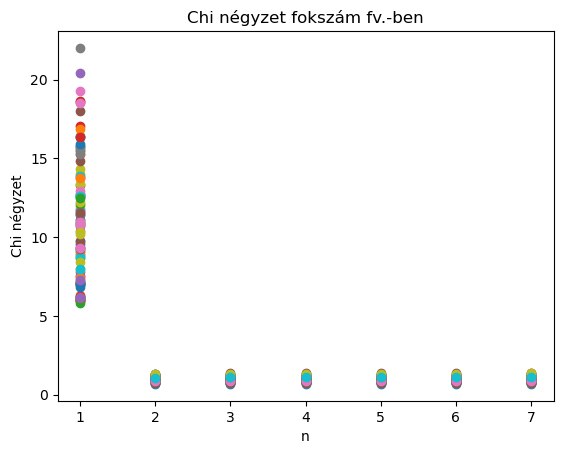

In [15]:
# Többszöri számolás
limit = 0
while limit < 100:
    x, y, sigma = random_data(101)
    chilist=[]
    nlist=[]
    for i in range(1,8):
        chilist.append(redchi2(x,y,sigma,i))
        nlist.append(i)

    plt.scatter(nlist,chilist)
    plt.xlabel('n')
    plt.ylabel('Chi négyzet')
    plt.title('Chi négyzet fokszám fv.-ben')
    limit +=1


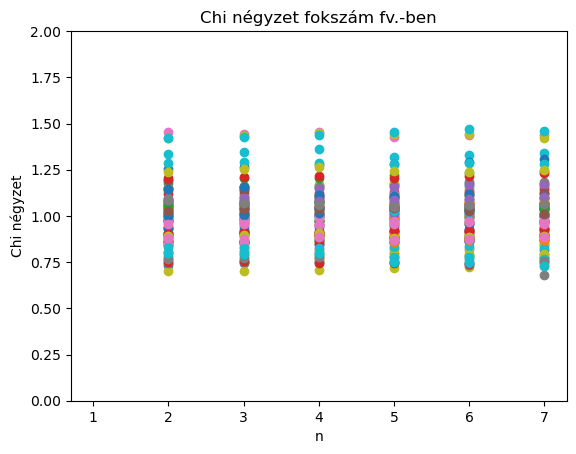

In [16]:
limit = 0
while limit < 100:
    x, y, sigma = random_data(101)
    chilist=[]
    nlist=[]
    for i in range(1,8):
        chilist.append(redchi2(x,y,sigma,i))
        nlist.append(i)

    plt.scatter(nlist,chilist)
    plt.xlabel('n')
    plt.ylabel('Chi négyzet')
    plt.title('Chi négyzet fokszám fv.-ben')
    plt.ylim(0,2)
    limit +=1


In [17]:
# Tapasztalatok:

Mivel az illesztés akkor jó ha chi négyzet kisebb egyenlő egy a 1. fokú tehát lineáris kizárható, mivel kevés és közeli adatsorunk van a magas fokszámú illesztéseket ez alapján nem lehet nagyon kizárni, a khi négyzetek azonosak a magasabb fokúakra is, ha limitáljuk az elképzelhető y és x értékeket talán lehet szűkiteni a vizsgálatot

## <font color='green5'>5. Szorgalmi feladatrész</font>
Alkalmazzuk a "Modell választás" anyagrészben leírt módszert!
Az adathalmazból minden második pontot a traning halmazba, a maradékot a validációs halmazba téve számoljuk ki az $n$-edfokú polinom illesztési együtthatókat a training halmazon, majd a kiszámolt illesztési együtthatókkal határozzuk meg a validációs halmazra vonatkozó $\chi^2$ értéket. Ne normáljunk a redukált $\chi^2$ értékhez hasonlóan! Ábrázoljuk ezt is $n$ függvényében, és próbáljuk megállapítani a valódi fokszámot! Könnyebben tudunk-e következtetni a fokszámra, mint a 4-es feladatrész esetén?

Idemásolva az adatsort generáló utasítást, azt is próbáljuk ki, milyen gyakran lesz a minimum az $n=2$ közelében! 
Foglaljuk össze röviden a tapasztalatainkat!

In [18]:
# a training és validációs halmaz létrehozása és számolások


In [19]:
# Tapasztalatok:


## <font color='green5'>6. Szorgalmi feladatrész</font>

A 3-ik feladatrészben kaptunk egy eloszlást a paraméter vektorra a szintetikus adatsorok segítségével. Az eloszlás elemei szintetikus adatsorokra való illesztéssel kapott $\mathbf{a}_{(i)}^{(S)}$ paraméter vektorok. Ezek segítségével

a) Határozzuk meg a 95\%-os konfidencia intervallumokat az eredeti adatsorra való illesztésből kapott $\mathbf{a}_{(0)}$ paraméterekre. Tehát keressük meg minden $k$-ra azt az intervallumot, amelyre igaz, hogy a pontok 2.5\%-a van rajta kívül pozitív és negatív irányba egyaránt!
Ezzel tudjuk becsülni az $a_{(0)k}$ érték alapján a minket érdeklő valódi $a_{{\rm (true)}k}$ értéket.
Mivel lehet ezt összevetni a korábbi eredmények közül?

b) Határozzunk meg a 95%-os konfidencia-tartományt a 3 dimenziós paramétertérben! Ezt a tartományt most az eredeti adatsorral generált $\chi^2$ függvény segítségével határozzuk meg. Keressük meg tehát azt a $\chi^2$ határértéket, melyre igaz, hogy az $\mathbf{a}_{(i)}^{(S)}$ paraméter vektorok 95%-ához tartozik ennél kisebb $\chi^2$ érték! Ez azt jelenti, hogy minden $\mathbf{a}_i^{(S)}$-hez kiszámoljuk a $\chi^2$ értéket, ezeket sorrendezve leolvashatjuk a határértéket. Utána ábrázoljuk a paramétervektorokat az $a_k,a_l$ vetületekben úgy, hogy a hatérték alatti és feletti $\chi^2$-tel rendelkezők eltérő színűek legyenek. Határozzuk meg azt is, hogy az $a_k$ értékek milyen intervallumába esnek a belső pontok, majd hasonlítsuk össze az így kapott intervallumokat az a)-beliekkel.

In [ ]:
# a)
# konfidencia intervallumok számolása

# összevetés


In [ ]:
# b)
# konfidencia tartomány számítás


## <font color='green5'>7. Szorgalmi feladatrész</font>
 
 Az előadáson röviden említésre került a Singular Value Decomposition (SVD) módszer. Ennek segítségével egy tetszőleges $N \times M$ méretű téglalap mátrixot a következő módon faktorizálhatunk:

$$
\mathbf{A} = \mathbf{U} \mathbf{S} \mathbf{V}^\mathrm{T},
$$

ahol az $\mathbf{S}$ mátrix diagonális, és főátlójában az ún. $s_i$ szinguláris értékeket tartalmazza.
Itt a diagonális úgy értendő, hogy az $S_{ij}$ elemek $i\neq j$ esetén $0$ értékűek, de a mátrix az $\mathbf{A}$-vel azonos, $N \times M$ méretű.
$\mathbf{V}$ ortogonális mátrix, és oszlopaiban a jobboldali szinguláris vektorok jelennek meg.
$\mathbf{U}$ ortogonális mátrix, az ő oszlopaiban pedig a baloldali szinguláris vektorok jelennek meg.
A szinguláris értékek száma $K = \min(M, N)$, $\mathbf{U}$ és $\mathbf{V}$ pedig $N \times N$ és $M \times M$ méretű mátrixok.
Belátható, hogy

* az $\mathbf{U}$ oszlopaiban lévő baloldali szinguláris vektorok azonosak az $\mathbf{A}\mathbf{A}^\mathrm{T}$ mátrix ortonormált sajátvektoraival
* a $\mathbf{V}$ oszlopaiban lévő jobboldali szinguláris vektorok azonosak az $\mathbf{A}^\mathrm{T}\mathbf{A}$ mátrix ortonormált sajátvektoraival
* a nem zérus szinguláris értékek azonosak $\mathbf{A}\mathbf{A}^\mathrm{T}$ és $\mathbf{A}^\mathrm{T}\mathbf{A}$ nem zérus sajátértékeinek négyzetgyökeivel.

(A teljesség kedvéért megemlítjük, hogy komplex $\mathbf{A}$ esetén minden ugyanúgy érvényes, csak $\mathbf{U}$ és $\mathbf{V}$ unitér mátrixok, a transzponált helyett pedig mindenütt adjungált írandó (transzponált konjugált). Az $s_i$ értékek viszont továbbra is valósak.)

a) Írjuk fel, hogyan tudjuk kiszámolni az SVD felbontás segítségével az 1. feladatrészben definiált $\mathbf{a}$ paramétervektort! Végezzük el a számítást a megfelelő python rutin segítségével! 

b) Megmutatható, hogy az $\mathbf{a}$ egyes elemeinek a varianciája a következő módon számolható:

$$
\sigma^2(a_j)=\sum_{i=1}^{M} \left(\frac{V_{ji}}{s_i}\right)^2,
$$

$\sigma(a_j)$-vel jellemezhetjük az egyes elemek hibáját. Számoljuk ki ezeket és hasonlítsuk össze a korábban kapott eredményekkel!

In [ ]:
# a)


In [ ]:
# b)
